In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')

# seaborn의 여러 그래프들에 대하여

# Axes-level
1. 데이터는 list, ndarray, Series 등 iterable 객체로 받는다.
2. 혹은 DataFrame의 컬럼을 넣는다.
3. 혹은 DataFrame 자체를 넣는다.(ex) boxplot...)
    - stripplot() - swarmplot()
    - boxplot() - boxenplot()  violinplot()  pointplot()
    - barplot() - countplot()
    
4. 함수 인자 중 ax를 구체화 시켜야한다.( sns.scatterplot(\~~,ax=axes\[1,3\]))

각 axes의 세부사항을 제어하기 위해서는 matplotlib의 함수를 이용한다.<br>
ex) <br>
sns.scatter(\~\~,ax=axes\[1,3\])<br>
axes\[1,3\].set_title(\~~)


# Figure-level
- FacetGrid : 전체 데이터에서 각 부분집합들에서의 관계 시각화
- PairGrid : 각 특성들간의 관계
- JointGrid : bi-variate distribution을 그리고자 할 때

## FacetGrid

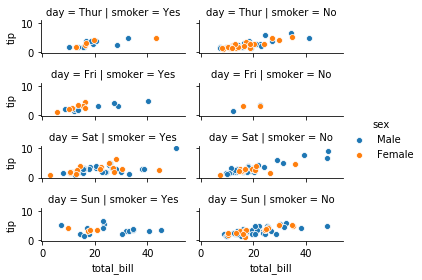

In [6]:
facet_grid = sns.FacetGrid(row='day', col='smoker', hue='sex', data=tips, height=1, aspect=2.5)
facet_grid.map(sns.scatterplot, 'total_bill','tip')
facet_grid.add_legend()

seaborn에서는 FacetGrid 함수에서 사용할 수 있는 다음 3가지 그래프를 제공한다. kind 인자를 이용해 지정할 수 있다.
- "relplot()" - FacetGrid() + lineplot()   / scatterplot()
- "catplot()" - FacetGrid() + stripplot()  / swarmplot()   / boxplot()
- "catplot()" - FacetGrid() + boxenplot()  / violinplot()  / pointplot()
- "catplot()" - FacetGrid() + barplot()    / countplot()
- "lmplot()"  - FacetGrid() + regplot()

### sns.그래프의 종류 주목

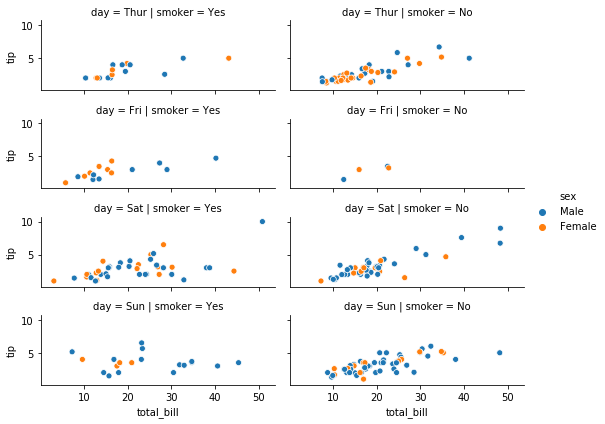

In [10]:
grid = sns.relplot(x='total_bill', y='tip', row='day', col='smoker', hue='sex', data=tips, 
                   kind='scatter', height=1.5, aspect=2.5)

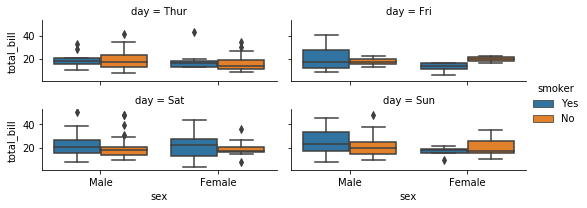

In [14]:
# 실제로는 4개로 이뤄진 1차원 그래프, col_wrap을 통해 2x2모양으로 나타남
grid = sns.catplot(x='sex', y='total_bill', col='day', col_wrap=2, hue='smoker', data=tips, 
                   kind='box', height=1.5, aspect=2.5)

Text(0.5, 1, 'aa')

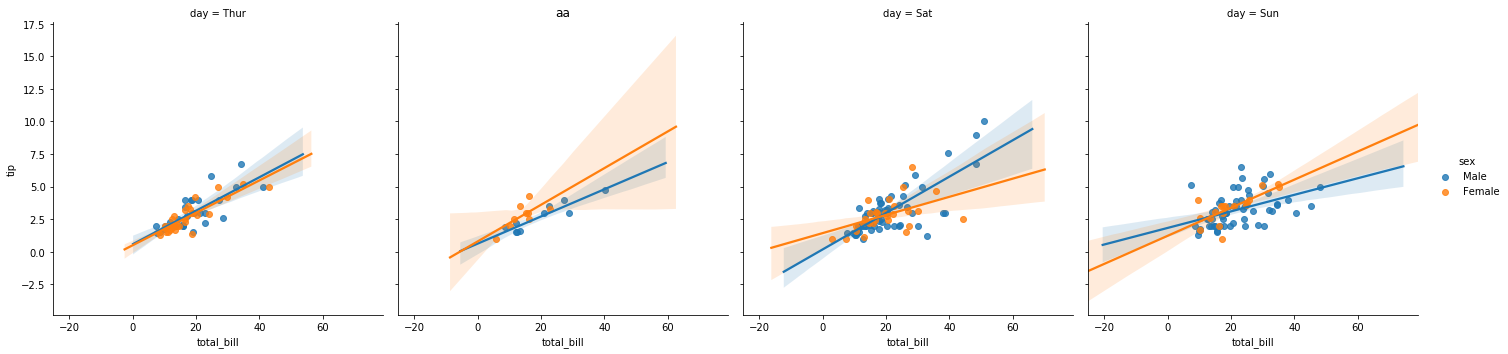

In [32]:
# col_wrap은 한 줄에 나타낼 Axes의 개수
grid = sns.lmplot(x='total_bill', y='tip', col='day', col_wrap=4, hue='sex', data=tips)

# 특정 Axes만 통제하고 싶다면 다음과 같이
all_axes = grid.axes
all_axes[1].set_title('aa')

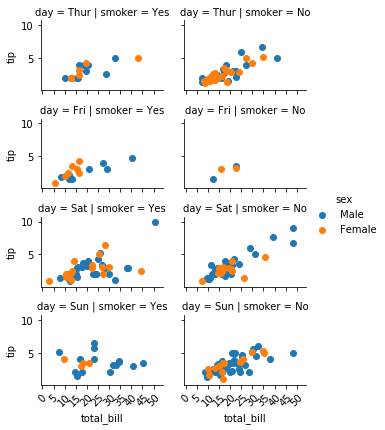

In [34]:
facet_grid = sns.FacetGrid(row='day', col='smoker', hue='sex', data=tips, height=1.5, aspect=1.5)
facet_grid = facet_grid.map(plt.scatter, 'total_bill','tip')
facet_grid = facet_grid.add_legend()
all_axes = facet_grid.axes
for ax in all_axes.flatten():
    ax.set_xticks(np.arange(0,55,5))
    ax.tick_params('x', labelrotation=45)

## PairGrid

In [36]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

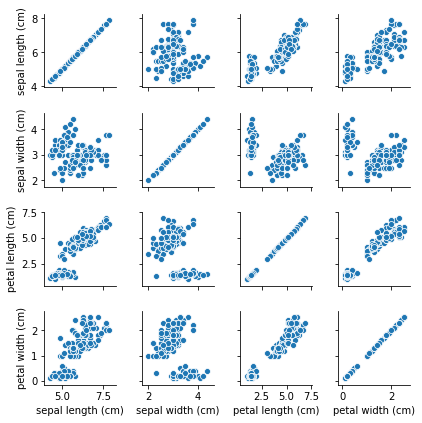

In [38]:
pairgrid = sns.PairGrid(data=iris_df,height=1.5)
pairgrid.map(sns.scatterplot)

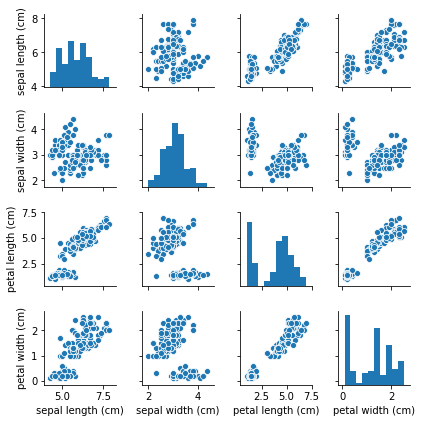

In [39]:
# 대각 성분과 비대각 성분으로 구분지어 그릴 수 있다.
pairgrid = sns.PairGrid(data=iris_df,height=1.5)
pairgrid.map_offdiag(sns.scatterplot)
pairgrid.map_diag(plt.hist)

# sns.pairplot(data=iris.data)하면 동일한 그림을 얻을 수 있다.

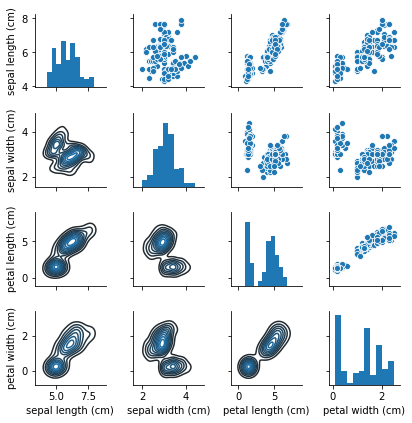

In [40]:
# 대각성분과 그 위의 성분, 그 아래의 성분으로 나눠서 그릴 수 있다.
pairgrid = sns.PairGrid(data=iris_df,height=1.5)
pairgrid.map_upper(sns.scatterplot)
pairgrid.map_diag(plt.hist)
# kdeplot: 밀도를 그리는 것, 일변수 함수로 그려보면 (당연하게도 1을 초과하지 않는) 밀도함수가 나온다.
pairgrid.map_lower(sns.kdeplot)

## JointGrid
두 변수의 결합 분포는 scatter/regplot/kedplot으로 시각화할 수 있다.<br>
Marginal 분포는 히스토그램/kde plot으로 시각화할 수 있다.

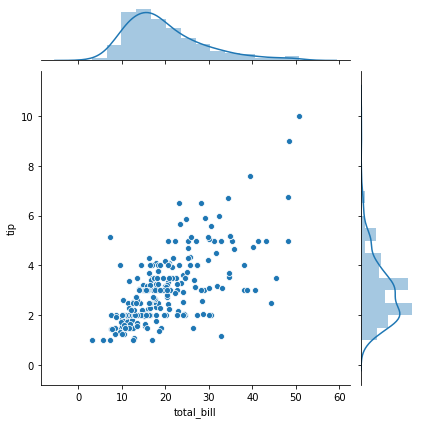

In [58]:
jointgrid = sns.JointGrid(x='total_bill', y='tip', data=tips)
jointgrid.plot_joint(sns.scatterplot)
jointgrid.plot_marginals(sns.distplot)

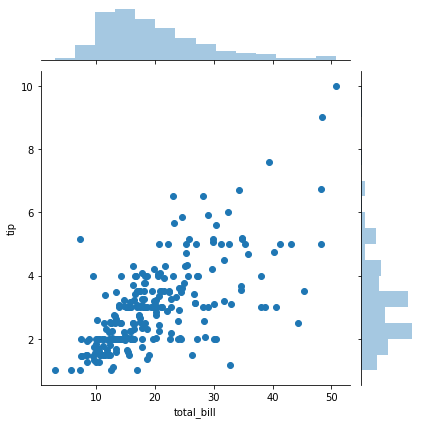

In [52]:
# JointGrid말고 jointplot은 marginal분포로 histogram을 제공한다.
sns.jointplot(x='total_bill', y='tip', data=tips)

JointGrid()와 jointplot()는 둘 다 JointGrid() 객체를 반환한다.JointGrid() 객체를 이용해 각각의 Axes에 라벨링, 타이틀 등의 속성으로 접근할 수 있다.

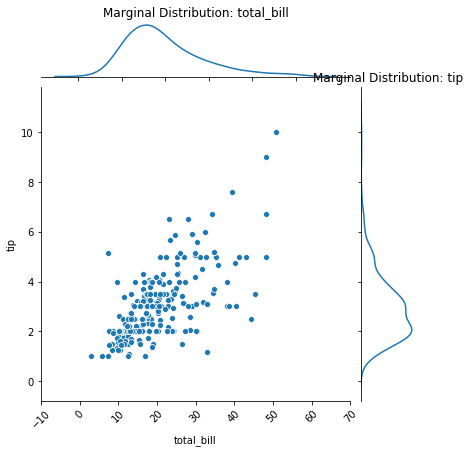

In [59]:
jointgrid = sns.JointGrid(x='total_bill', y='tip', data=tips)
jointgrid.plot_joint(sns.scatterplot)
jointgrid.plot_marginals(sns.kdeplot)
jointgrid.ax_marg_x.set_title('Marginal Distribution: total_bill')
jointgrid.ax_marg_y.set_title('Marginal Distribution: tip')
jointgrid.ax_joint.set_xticks(np.arange(-10,80,10))
jointgrid.ax_joint.tick_params('x', labelrotation=45)

# 요약

In [ ]:

# Axes Level Functions
'''
  Relational Plots
    scatterplot()
    lineplot()
  Categorical Plots
    striplot()    swarmplot()
    boxplot()     boxenplot()
    violinplot()  countplot()
    pointplot()   barplot()
  Distribution Plots
    distplot()
    kdeplot()
    regplot()
  Regression Plots
    regplot()
    residplot()
  MatrixPlots()
    heatmap()
'''
''''''

In [61]:

# Figure Level Functions
'''
  FacetGrid
    relplot() - FacetGrid() + lineplot()   / scatterplot()
    catplot() - FacetGrid() + stripplot()  / swarmplot()   / boxplot()
                              boxenplot()  / violinplot()  / pointplot()
                              barplot()    / countplot()
    lmplot()  - FacetGrid() + regplot()
  Pairgrid
    pairplot()
  JointGrid
    jointplot()
'''
''''''

''

In [3]:
import pandas as pd
pd.__version__

'0.25.1'

# 히트맵 잘리는 현상 방지

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
sns.heatmap(dfdf,cbar=True,annot=True,vmin=0, vmax=0.05,linewidth=0.5,ax=ax)
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)